<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Columns: 120 entries,  asparagus to zucchini
dtypes: bool(120)
memory usage: 879.0 KB
------------------------------------------------------------------------------------------------------------------------

Frequent Itemsets for support = 0.01:
------------------------------------------------------------------------------------------------------------------------
      support                               itemsets
0    0.029303                              (almonds)
1    0.011062                    (antioxydant juice)
2    0.045993                              (avocado)
3    0.012614                                (bacon)
4    0.015525                       (barbecue sauce)
..        ...                                    ...
431  0.014749  (olive oil, mineral water, spaghetti)
432  0.016689   (pancakes, mineral water, spaghetti)
433  0.012420     (shrimp, mineral water, spaghetti)
434  0.010867       (soup, mi

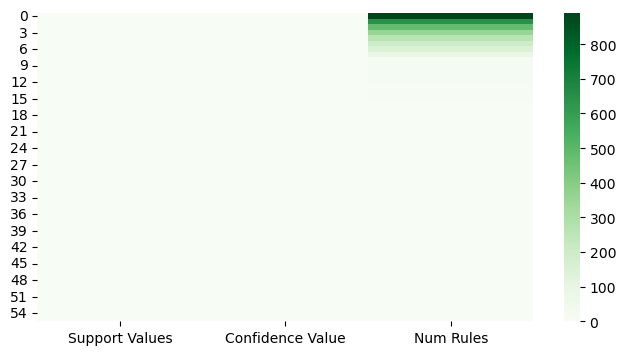

------------------------------------------------------------------------------------------------------------------------


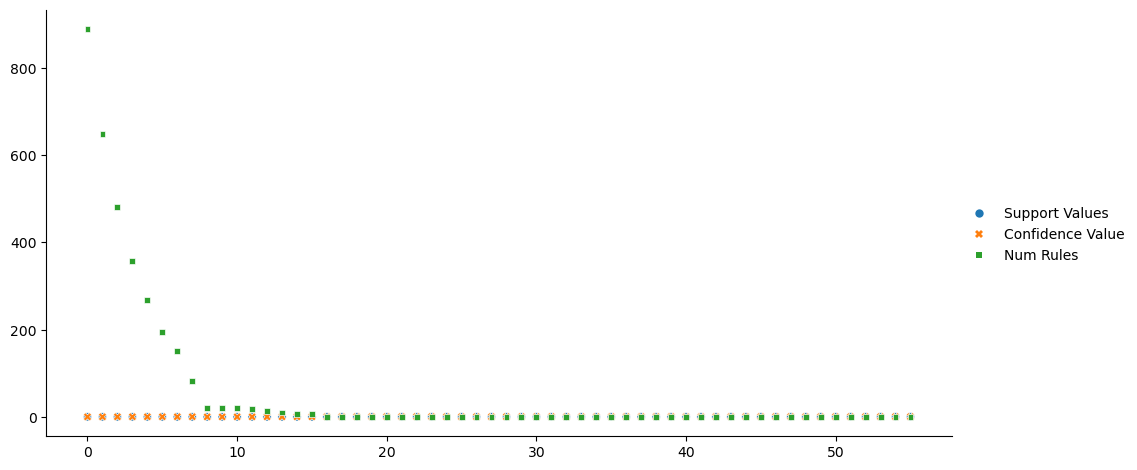

------------------------------------------------------------------------------------------------------------------------


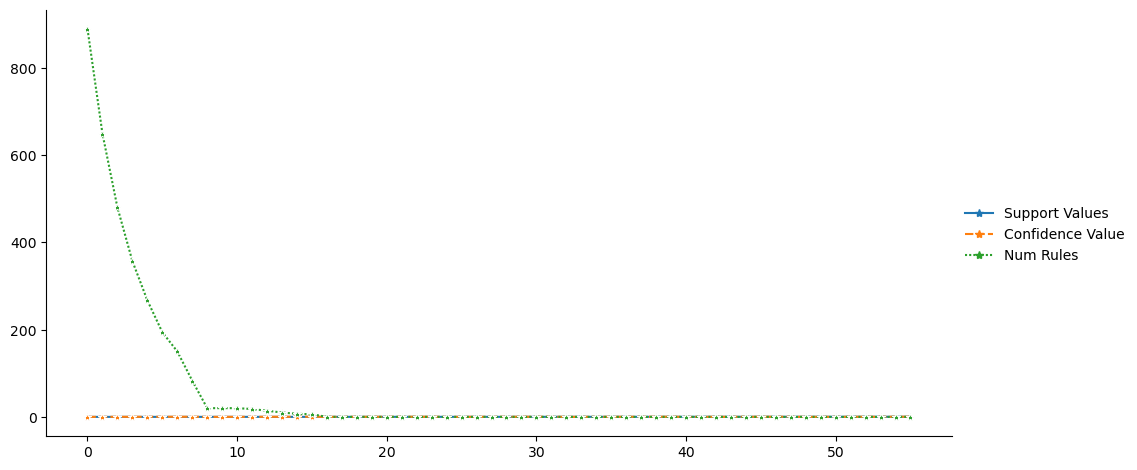

In [48]:
#!pip install mlxtend
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Importing TransactionEncoder,apriori and association rules from mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
# Loading Data from excel file
df=pd.read_excel('Online retail.xlsx',sheet_name='Sheet1')
trans=df.iloc[:,0].apply(lambda x : x.split(','))
# Converting it into list
df_list=trans.tolist()
df_list
# Converting Transaction data into Encoded values
te = TransactionEncoder()
te_ary = te.fit_transform(df_list)
# Converting back into DATAFRAME for analysis with TRUE/FALSE
enc_df=pd.DataFrame(te_ary,columns=te.columns_)
enc_df.head()
# Evaluating Data
enc_df.info()
print('-'*120)
enc_df.describe()
enc_df.isnull().sum()
enc_df[enc_df.duplicated()]
enc_df.drop_duplicates(inplace=True)
enc_df.shape
enc_df['almonds'].value_counts()
enc_df[enc_df.duplicated()]
# Support values and Confidence values
support_val=[0.01,0.05,0.1,0.11,0.15,0.2,0.25,0.3]
confidence_val=[0.05,0.1,0.15,0.2,0.24,0.27,0.3,0.35]
# List to store result
rules_count=[]
# For loop is made to use Various values of Support & Confidence in Apriori
for su_val in support_val:
    frequent_itemset=apriori(enc_df,min_support=su_val,use_colnames=True)
    # Some of Support values given are Max to avoid error in association rule
    if frequent_itemset.empty:
        print(f'no frequent itemset found for support values : {su_val}')
        print('-'*120)
        continue
    print(f"\nFrequent Itemsets for support = {su_val}:")
    print('-'*120)
    print(frequent_itemset)
    print('-'*120)
        
    for confi_val in confidence_val:        
            acc_rules=association_rules(df=frequent_itemset,metric='confidence',min_threshold=confi_val)
            if acc_rules.empty:
                print(f'no rules are found for this support: {su_val} and confidence values : {confi_val}')
                print('-'*120)
            else:
                print(f"\nAssociation Rules for support = {su_val} and confidence = {confi_val}:")
                print('-'*120)
                print(acc_rules)
                print('-'*120)
             # Storing Result in list   
            rules_count.append((su_val,confi_val,len(acc_rules)))
# Converting List into dataframe
rules_df=pd.DataFrame(rules_count,columns=['Support Values','Confidence Value','Num Rules'])
rules_df
# Ploting heat map (how the number of association rules changes with different support and confidence values.)
plt.figure(figsize=(8,4))
sns.heatmap(rules_df,cmap='Greens')
plt.show()
print('-'*120)
# Ploting Scatter plot
sns.relplot(rules_df,kind='scatter',height=5,aspect=2)
plt.show()
print('-'*120)
# Line plot for trend visualization
sns.relplot(rules_df,kind='line',markers='*',height=5,aspect=2)
plt.show()

### Analysis & Interpretation

        A total of 120 items among them many are strongly associated with one another,in that considering min support is taken as 5% Frequent item sets are determined most of them are single itmesets and few are 2 item itemsets.Furthur Association rules are formed based on frequent itemsets in which threshold is 0.1 with metric of confidence and finally sorted by lift.
        From the rules based on lift groundbeef and spaghetti are having high lift of 1.78,Mineral water and ground beef are having 1.44 and mineralwater with milk having 1.32,mineral water with spaghetti are having 1.23 as lift value. Here mineral water and groundbeef are main items which are having support of 5% and Confidence of 20% and Itemssets like Ground beef, milk,mineral water , spaghatti,eggs and chocolate have good cinfidence and lift.By this I can conclude that above mentioned Items are strongly asscoiated with one other.

### Interview Questions
    1.
        1.Lift is a metric which is defined as measure of how likely x is bought along with z,whcih are independent of each other.
        e.g., A young married man buys Dipers for baby and also beer for him.
        2.Lift(X,Y)=(Support(X,Y))/(Support(X)*Support(Y))
        3.If Lift (L) > 1 then its strongly associated,L=0 which are independent and L<0 which are negatively associate with each other
        4.Lift is crucial because it helps in filtering out rules that appear strong based on confidence alone but are actually just common occurrences.
    2.  
        1.Support is measure of how frequenty an item appers in transaction.
         Support(X) = (No.Of Times X in Transactions)/Total number of transactions
        2.Confidenc is a measuring technique in association rules in which likelyhood of buying Y is determined who already bought X .
        Which is used to know relation betwwen items in tranaction.
         Confidence(X,Y) = (Support(X,Y))/(Support(X))
        3.High value of Confidence suggest that If X is Purchased then Y is purchase morelikely.
    3.
        Limiations of Assocation Rule Mining:
         1.Setting minimum support and confidence values is tricky.
         2.Computational complexity.
         3.In large datasets with many items, meaningful associations may be rare, making it hard to extract useful rules.
         4.Customer requirements are changing overtime.
         5.Too many Rules & Not always use full.
        